In [1]:
import pickle
import os
from rulu.covariance_CI_test import *
from rulu.utils import find_all_tests_in_same_category
from matplotlib import pyplot as plt
# from scipy.stats import percentileofscore

In [2]:
def find_all_tests_in_same_category(test, in_dir='../output'):
    """
    Retrieve all tests in `in_dir` that is of the same type as the specified `test`
    """
    
    def get_tests_from_pickle_file(file_path):
        filehandler = open(file_path, 'rb')
        return pickle.load(filehandler)
    
    tests_pickle_fps = [
        os.path.join(in_dir, file)
        for file in os.listdir(in_dir) 
        if str(test.__class__.__name__) in file]
    
    return [test for tests in map(get_tests_from_pickle_file, tests_pickle_fps)
            for test in tests]

def print_test_collection_result(test_collection: List[CovarianceCITest]) -> None:
    if test_collection is None or len(test_collection) == 0:
        print("There is nothing in the provided test collection.")
        return
    within_CI = [test.theoretical_quantity_in_sample_CI()
                 for test in test_collection]
    
    print(test_collection[0].get_test_name() + 
          ": {}/{} ({}%) "
          .format(np.sum(within_CI), len(within_CI), 
                  np.round(100.0 * np.sum(within_CI) / len(within_CI), 2)) +
          "of the tests have the theoretical quantity within the CI.")

In [2]:
cov_Yr_Ys_tests = find_all_tests_in_same_category(
    CovYrYsCITest(sigma_sq_1=0.5**2), 
    in_dir="./output/cov_CI_tests/")
cov_Yr_Ys_second_order_tests = find_all_tests_in_same_category(
    CovYrYsSecondOrderCITest(sigma_sq_1=0.5**2), 
    in_dir="./output/cov_CI_tests/")
cov_Yr_Zs_tests = find_all_tests_in_same_category(
    CovYrZsCITest(), in_dir="./output/cov_CI_tests/")
cov_Yr_Zs_second_order_tests = find_all_tests_in_same_category(
    CovYrZsSecondOrderCITest(), in_dir="./output/cov_CI_tests/")
cov_XIr_XJs_tests = find_all_tests_in_same_category(
    CovXIrXJsCITest(), in_dir="./output/cov_CI_tests/")
cov_XIr_XJs_second_order_tests = find_all_tests_in_same_category(
    CovXIrXJsSecondOrderCITest(), in_dir="./output/cov_CI_tests/")


In [3]:
for test_collection in [cov_Yr_Ys_tests, cov_Yr_Ys_second_order_tests,
                        cov_Yr_Zs_tests, cov_Yr_Zs_second_order_tests, 
                        cov_XIr_XJs_tests, cov_XIr_XJs_second_order_tests]:
    print_test_collection_result(test_collection)

Cov(Y_(r), Y_(s)): 4688/4940 (94.9%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Y_(s)) - 2nd order: 4940/4940 (100.0%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Z_(s)): 4663/4940 (94.39%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Z_(s)) - 2nd order: 4739/4940 (95.93%) of the tests have the theoretical quantity within the CI.
Cov(X_I(r), X_J(s)): 4403/4940 (89.13%) of the tests have the theoretical quantity within the CI.
Cov(X_I(r), X_J(s)) - 2nd order: 4492/4940 (90.93%) of the tests have the theoretical quantity within the CI.


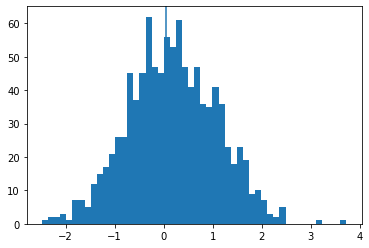

In [4]:
test = cov_XIr_XJs_second_order_tests[123]

plt.figure()
plt.hist(test.samples, bins=50)
plt.axvline(test.theoretical_quantity())
plt.show()

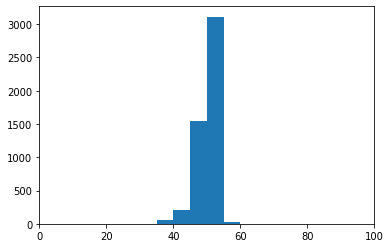

In [5]:
test_collection = cov_Yr_Ys_second_order_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 105, 5))
plt.xlim(0, 100)
plt.show()

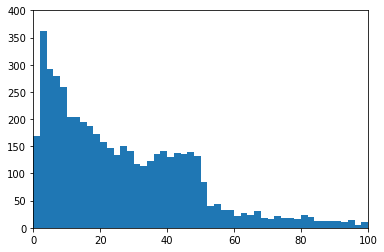

In [6]:
test_collection = cov_Yr_Zs_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 102, 2))
plt.xlim(0, 100)
plt.ylim(0, 400)
plt.show()

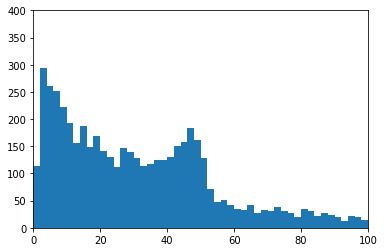

In [7]:
test_collection = cov_Yr_Zs_second_order_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 102, 2))
plt.xlim(0, 100)
plt.ylim(0, 400)
plt.show()

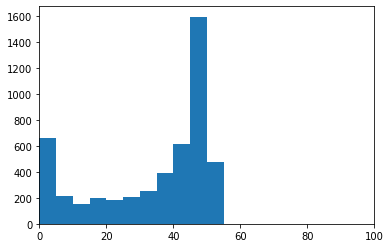

In [8]:
test_collection = cov_XIr_XJs_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 105, 5))
plt.xlim(0, 100)
plt.show()

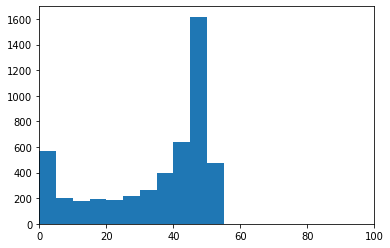

In [9]:
test_collection = cov_XIr_XJs_second_order_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 105, 5))
plt.xlim(0, 100)
plt.show()

In [10]:
for test in cov_XIr_XJs_second_order_tests:
    if not test.theoretical_quantity_in_sample_CI():
        print(test.N, test.r, test.s,  "    \t",
              np.round(test.sigma_sq_X, 3), 
              np.round(test.sigma_sq_1, 3), np.round(test.sigma_sq_2, 3), "\t",
              np.round(test.theoretical_quantity(), 3),
              np.round(test.sample_CI(), 3), "\t",
              np.round(test.sample_CI() / test.theoretical_quantity(), 4)
             )

52 51 51     	 31.526 5.911 3.559 	 2.361 [2.731 5.231] 	 [1.1565 2.2155]
56 55 53     	 83.327 50.616 0.941 	 2.296 [3.194 7.677] 	 [1.3913 3.3442]
23 22 20     	 22.188 8.516 0.92 	 1.001 [1.232 2.727] 	 [1.2307 2.7249]
16 16 16     	 18.484 57.994 11.732 	 0.682 [1.99  6.293] 	 [2.9174 9.2274]
16 15 15     	 6.068 14.69 4.22 	 0.203 [0.217 1.37 ] 	 [1.0668 6.7494]
356 356 355     	 89.255 14.652 1.875 	 4.47 [4.716 9.243] 	 [1.055  2.0678]
31 31 30     	 58.2 69.207 28.302 	 1.598 [ 3.577 12.851] 	 [2.2387 8.0421]
10 9 9     	 80.74 56.31 0.989 	 6.863 [11.263 20.476] 	 [1.6411 2.9835]
12 12 12     	 37.974 15.314 1.428 	 6.316 [10.054 16.519] 	 [1.5917 2.6153]
23 22 23     	 20.129 7.228 1.53 	 1.438 [1.885 4.085] 	 [1.3109 2.8404]
25 25 25     	 61.666 6.995 2.037 	 12.19 [13.648 21.256] 	 [1.1196 1.7438]
31 30 31     	 22.377 9.519 3.424 	 1.269 [1.915 4.379] 	 [1.5098 3.4524]
17 12 15     	 58.611 26.563 0.854 	 2.201 [2.484 6.414] 	 [1.1285 2.9141]
30 29 29     	 4.948 1.331 0.

24 24 24     	 88.613 74.4 28.349 	 6.431 [16.979 32.44 ] 	 [2.6403 5.0445]
12 12 11     	 27.956 47.831 2.279 	 0.973 [3.043 6.87 ] 	 [3.1268 7.0597]
22 22 22     	 9.93 7.923 2.766 	 0.789 [1.892 3.712] 	 [2.3965 4.702 ]
10 10 10     	 10.352 6.27 0.279 	 1.488 [2.837 4.681] 	 [1.9068 3.1462]
12 11 11     	 36.84 13.375 0.603 	 4.055 [5.527 9.032] 	 [1.3629 2.2272]
15 12 14     	 33.316 27.722 8.357 	 1.194 [1.411 5.596] 	 [1.1821 4.6878]
11 9 11     	 27.331 79.216 1.327 	 0.447 [1.171 5.672] 	 [ 2.6178 12.6831]
20 18 18     	 38.928 57.62 6.67 	 1.168 [1.51  6.265] 	 [1.2923 5.3622]
16 16 15     	 99.682 16.521 1.305 	 10.495 [10.949 19.602] 	 [1.0433 1.8678]
13 11 11     	 97.225 4.883 2.172 	 12.165 [12.46  18.738] 	 [1.0242 1.5403]
195 194 195     	 23.52 11.621 5.047 	 0.718 [1.049 3.53 ] 	 [1.4612 4.9177]
18 15 16     	 2.538 1.056 0.56 	 0.122 [0.148 0.395] 	 [1.2148 3.2434]
167 166 167     	 75.929 24.598 19.552 	 2.721 [ 3.929 11.299] 	 [1.4437 4.1522]
107 105 106     	 31.

12 12 12     	 7.494 1.608 0.04 	 1.599 [2.062 3.17 ] 	 [1.2893 1.9821]
32 32 32     	 82.254 59.715 46.892 	 4.847 [12.97  28.356] 	 [2.6759 5.8501]
25 23 20     	 36.519 15.268 1.962 	 1.205 [1.3   3.622] 	 [1.0789 3.0057]
75 75 75     	 74.149 53.786 46.766 	 3.23 [ 7.958 21.211] 	 [2.4635 6.5661]
16 16 16     	 55.925 14.173 6.956 	 9.267 [14.701 23.392] 	 [1.5864 2.5242]
15 12 11     	 24.872 11.918 7.48 	 1.119 [1.169 3.925] 	 [1.0445 3.5073]
29 29 29     	 44.703 12.237 4.884 	 6.351 [ 9.816 16.272] 	 [1.5457 2.5622]
48 48 48     	 46.581 75.861 69.967 	 1.003 [ 1.377 12.   ] 	 [ 1.3734 11.9647]
10 10 10     	 41.952 89.889 13.424 	 2.398 [ 8.179 17.595] 	 [3.4105 7.3369]
10 10 10     	 14.214 84.454 7.637 	 0.591 [1.784 5.067] 	 [3.0178 8.5716]
30 30 30     	 11.429 6.618 0.385 	 1.286 [2.139 3.838] 	 [1.6628 2.9832]
10 9 10     	 34.907 45.668 21.872 	 1.764 [ 3.766 10.303] 	 [2.1348 5.8396]
16 16 16     	 47.266 49.051 41.179 	 2.658 [ 8.069 18.865] 	 [3.0356 7.0971]
35 35 35

10 10 10     	 8.711 49.258 8.363 	 0.448 [0.919 3.166] 	 [2.0511 7.0675]
46 46 44     	 47.475 47.885 18.141 	 0.929 [0.967 7.272] 	 [1.0405 7.8266]
29 28 28     	 72.339 41.148 18.429 	 3.856 [ 5.887 14.224] 	 [1.5268 3.689 ]
15 15 15     	 39.016 75.144 35.923 	 1.798 [ 5.291 14.529] 	 [2.9418 8.0785]
21 21 21     	 75.126 43.874 31.987 	 6.3 [15.881 30.971] 	 [2.5207 4.9159]
24 20 19     	 28.805 5.1 2.026 	 1.464 [1.52  3.014] 	 [1.0385 2.0589]
12 11 10     	 46.567 3.538 2.066 	 4.875 [4.914 8.332] 	 [1.0079 1.7091]
12 12 12     	 29.402 84.752 1.037 	 1.131 [ 4.706 10.221] 	 [4.1611 9.0371]
12 11 11     	 95.657 76.241 18.343 	 6.481 [11.611 23.917] 	 [1.7913 3.6901]
15 14 14     	 75.043 10.184 0.258 	 10.165 [11.134 17.238] 	 [1.0953 1.6958]
34 34 34     	 86.503 54.961 49.787 	 5.316 [13.56  29.729] 	 [2.5508 5.5921]
33 32 33     	 42.222 15.575 6.12 	 2.504 [3.532 8.267] 	 [1.4109 3.3021]
23 22 23     	 69.177 13.861 5.836 	 5.843 [ 6.584 13.148] 	 [1.1269 2.2502]
55 55 53  

17 17 13     	 8.004 67.519 1.295 	 0.077 [0.084 1.088] 	 [ 1.0921 14.1329]
16 16 16     	 97.046 11.255 8.504 	 19.824 [24.922 39.637] 	 [1.2572 1.9995]
27 27 27     	 44.939 71.534 3.796 	 2.396 [ 5.855 13.584] 	 [2.4434 5.6686]
14 13 13     	 30.526 61.146 12.477 	 1.143 [2.137 7.039] 	 [1.8692 6.1566]
15 13 14     	 50.667 16.619 0.252 	 3.731 [4.782 8.679] 	 [1.2817 2.326 ]
71 70 71     	 35.832 14.412 4.81 	 1.678 [2.307 5.881] 	 [1.3746 3.5038]
25 25 25     	 65.06 78.683 21.279 	 3.677 [10.925 22.124] 	 [2.9713 6.017 ]
37 36 34     	 95.672 77.9 6.427 	 2.441 [ 3.48  11.069] 	 [1.4256 4.5347]
18 9 10     	 36.224 9.382 0.961 	 1.825 [1.93  3.865] 	 [1.0575 2.1179]
193 193 192     	 10.354 2.965 0.968 	 0.457 [0.601 1.355] 	 [1.3135 2.9626]
